# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wajir
Processing Record 2 of Set 1 | wagar
Processing Record 3 of Set 1 | rehoboth
Processing Record 4 of Set 1 | mvomero
Processing Record 5 of Set 1 | cao bang
Processing Record 6 of Set 1 | okhotsk
Processing Record 7 of Set 1 | palu
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | howrah
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | emerald
Processing Record 20 of Set 1 | dinguiraye
Processing Record 21 of Set 1 | isla mujeres
Processing Record 22 of Set 1 | benguela
Processing Record 23 of 

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wajir,1.7471,40.0573,27.98,54,0,6.69,KE,1738824773
1,wagar,16.1525,36.2032,26.33,53,0,5.51,SD,1738824774
2,rehoboth,-23.3167,17.0833,22.70,65,98,4.90,NA,1738824775
3,mvomero,-6.2500,38.6667,29.67,58,100,5.25,TZ,1738824776
4,cao bang,22.6667,106.2500,12.23,91,100,0.91,VN,1738824777


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wajir,1.7471,40.0573,27.98,54,0,6.69,KE,1738824773
1,wagar,16.1525,36.2032,26.33,53,0,5.51,SD,1738824774
2,rehoboth,-23.3167,17.0833,22.70,65,98,4.90,NaN,1738824775
3,mvomero,-6.2500,38.6667,29.67,58,100,5.25,TZ,1738824776
4,cao bang,22.6667,106.2500,12.23,91,100,0.91,VN,1738824777


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

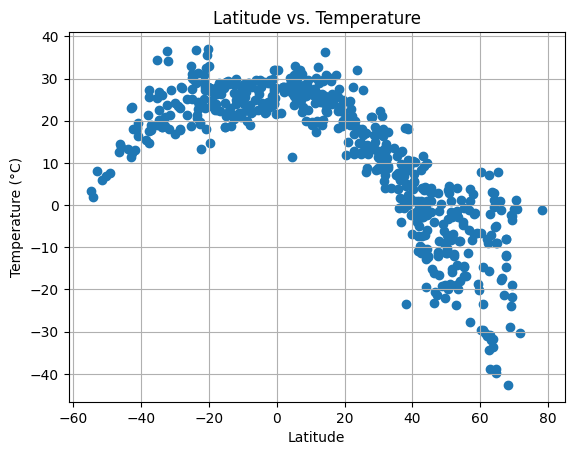

<Figure size 640x480 with 0 Axes>

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

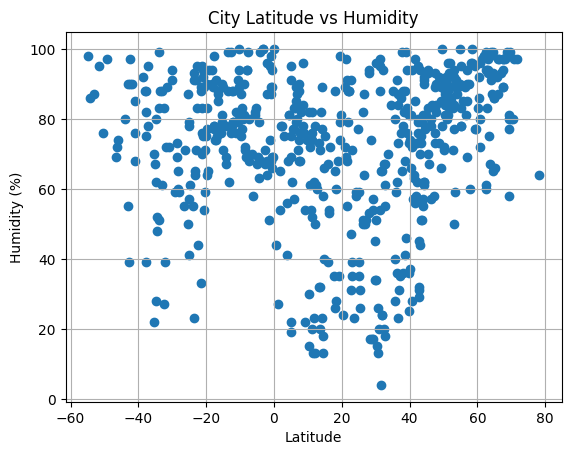

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

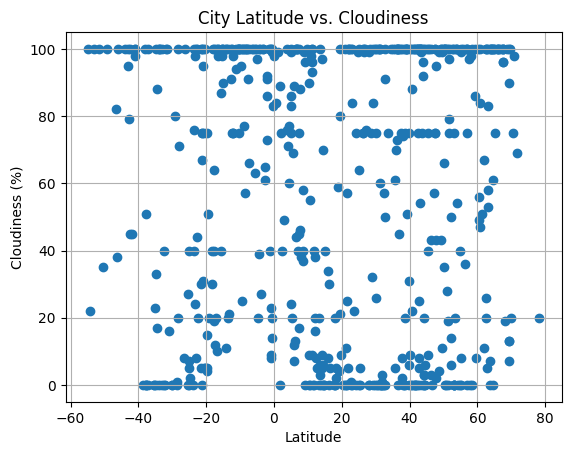

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

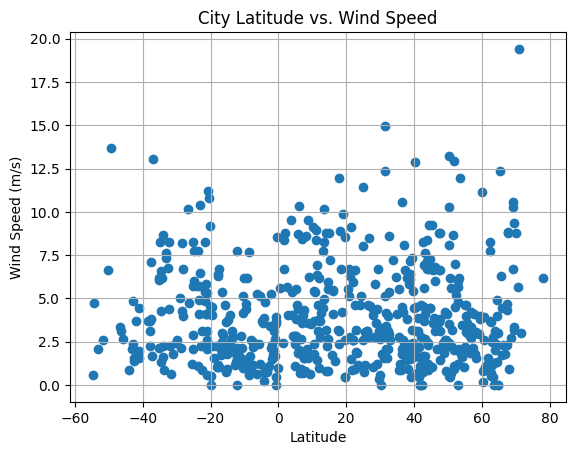

In [48]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def createRegress(x, y, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r^2-value is: {rvalue**2}")
    plt.scatter(x, y)
    plt.plot(x, regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    plt.title(title)
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wajir,1.7471,40.0573,27.98,54,0,6.69,KE,1738824773
1,wagar,16.1525,36.2032,26.33,53,0,5.51,SD,1738824774
4,cao bang,22.6667,106.2500,12.23,91,100,0.91,VN,1738824777
5,okhotsk,59.3833,143.3000,-18.73,77,86,4.00,RU,1738824778
9,dudinka,69.4058,86.1778,-18.88,98,100,3.32,RU,1738824783


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rehoboth,-23.3167,17.0833,22.70,65,98,4.90,NaN,1738824775
3,mvomero,-6.2500,38.6667,29.67,58,100,5.25,TZ,1738824776
6,palu,-0.8917,119.8707,27.52,89,100,1.66,ID,1738824779
7,port-aux-francais,-49.3500,70.2167,7.55,97,100,13.69,TF,1738824781
8,blackmans bay,-43.0167,147.3167,23.07,55,95,4.84,AU,1738824782


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.748948166965947


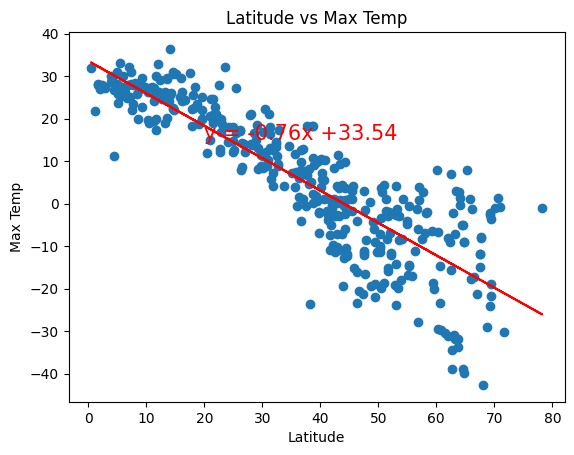

In [52]:
# Linear regression on Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

The r^2-value is: 0.30734718371008746


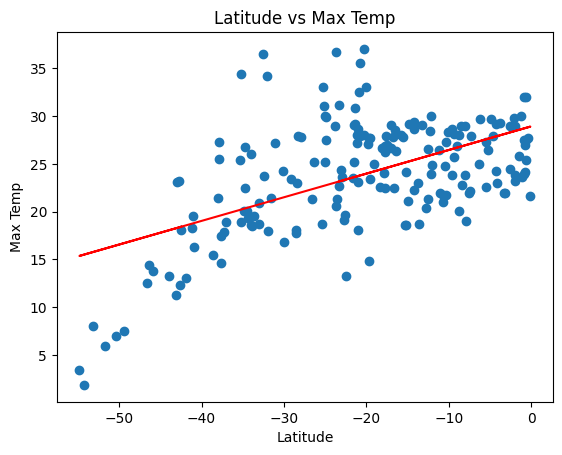

In [53]:
# Linear regression on Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

**Discussion about the linear relationship:** 
There is very high inverse correlation between latitude and temperature in the northern hemisphere with a r^2 value of 0.748 while a moderate positive correlation exists between latitude and temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.17059196823801184


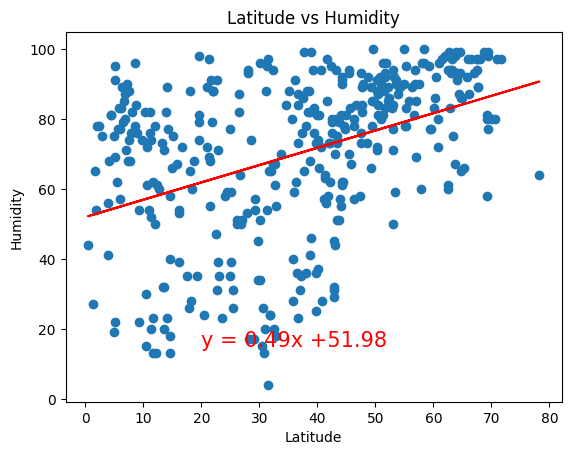

In [55]:
# Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

The r^2-value is: 0.00014367159540169783


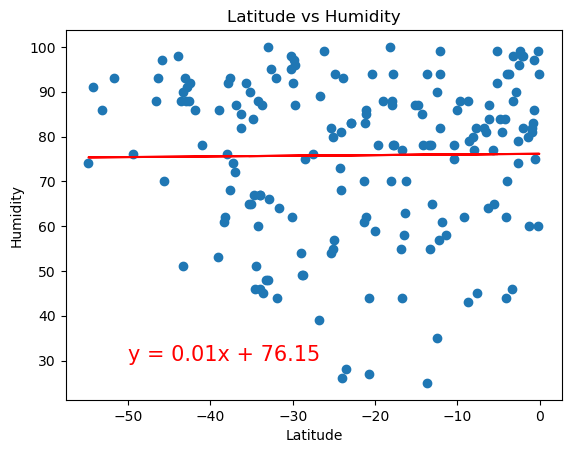

In [23]:
# Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

**Discussion about the linear relationship:** 
There exists a low correlation between latitude and humidity in the northern hemisphere with a r^2 value of 0.17 while there exists very insignificant or no correlation between latitude and humidity in the southern hemisphere with a r^2 value of 0.0001.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


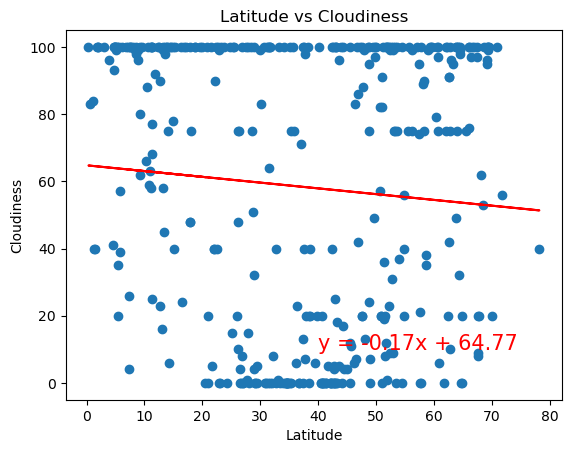

In [19]:
# Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

The r^2-value is: 0.018616831531634456


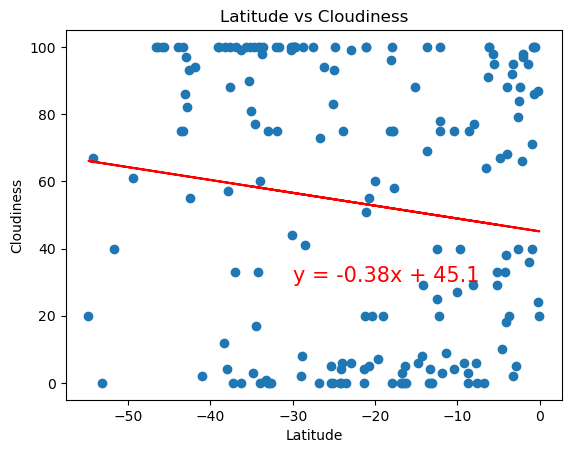

In [20]:
# Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

**Discussion about the linear relationship:** 
There exists a very insignificant or no correlation between latitude and cloudiness in the northern hemisphere with a r^2 value of 0.006 while there exists very insignificant or no correlation between latitude and cloudiness in the southern hemisphere with a r^2 value of 0.018.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


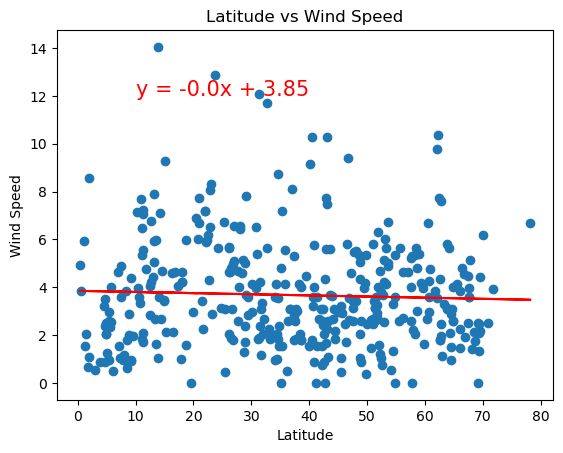

In [21]:
# Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

The r^2-value is: 0.06495869418886388


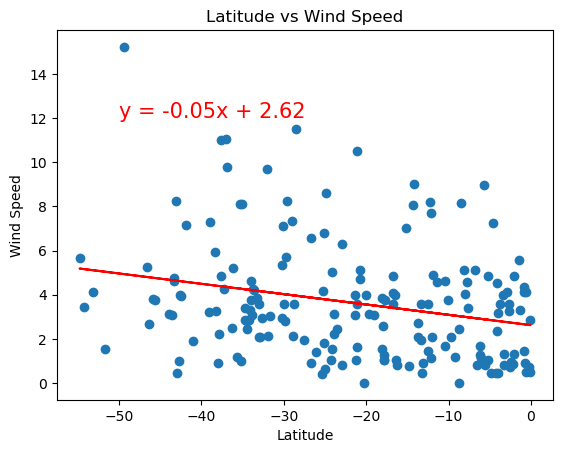

In [22]:
# Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

**Discussion about the linear relationship:** 
There exists a very insignificant or no correlation between latitude and wind speed in the northern hemisphere with a r^2 value of 0.0017 while there exists very weak correlation between latitude and cloudiness in the southern hemisphere with a r^2 value of 0.0648.